In [6]:
import xarray as xr
import hvplot.pandas # needed for hvplot to work with pandas DataFrames
import hvplot.xarray  # needed for hvplot to work with xarray DataArrays
from datetime import datetime, timedelta, date
import requests
from IPython.core.display import HTML

# harfbuzz-devel 
# on https://aqua.usegalaxy.eu
    # select Jupyter Interactive GIS Tool 
    # conda install xarray netcdf4

# Overview - North Sea

* Metadata 
    - Discovery metadata - [ACDD](https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3)
    - Use metadata - [Climate and Forecast Convention](https://cfconventions.org/)
* Data
    - [OPeNDAP](https://www.opendap.org/)
    - Many client libraries python, R, java, C++
    - timeseries & trajectories
    - Easy subsetting and lazy loading

```mermaid
flowchart TD
  tds["NIVA THREDDS"] -- "metadata" --> adc["adc.csw.met.no"]
  adc -- "metadata" --> ddas["DDAS(Data Discovery and Access Service)"]
  ddas -- "metadata" --> AIP["AIP(AquaINFRA Interaction Platform)"]
  tds --"data - OPeNDAP" --> galaxy["USEGALAXY"]
  tds --"data - OPeNDAP" --> binder["Other++"]
```

# Examples

* [Glomma River Logger](https://thredds.niva.no/thredds/catalog/subcatalogs/loggers.html?dataset=no.niva:af047ff6-e92a-47a0-a9ab-1b2d1e011092)
* Color Fantasy Ferrybox
    - [Color Fantasy - Daily](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:af11ba01-dfe3-4432-b9d2-4e6fd10714db)
    - [Color Fantasy NorSoop - historical](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:14bb8759-81d8-4a1a-948a-14219d374fab)


# AquaINFRA Interaction Platform

Searching https://aquainfra.dev.52north.org used to work:/ 

>Currently a minor bug in DDAS see https://vm4072.kaj.pouta.csc.fi/ddas/oapir/search?q=glomma&limit=100&collections=arcticdatacentre


## Usegalaxy - setup
1. Go to [Use Galaxy - Interactive JupyterGIS Notebook](https://aqua.usegalaxy.eu/?tool_id=interactive_tool_jupytergis_notebook&version=latest) and launch
2. In a terminal run `conda install xarray netcdf4`
3. Follow along in a notebook

## [Glomma dataset example](https://thredds.niva.no/thredds/catalog/subcatalogs/loggers.html?dataset=no.niva:af047ff6-e92a-47a0-a9ab-1b2d1e011092)

This example shows how to connect to the Glomma dataset, how to subset the data and how to plot data variables.

### Connect to dataset R

```R
library(tidync)

url=paste0('https://thredds.niva.no/thredds/dodsC/datasets/loggers/glomma/baterod.nc')
          
# Read the netcdf file from the url
data_glomma = tidync(url)
```

## Connect to dataset Python

In [2]:
ds_glomma = xr.open_dataset(
    "https://thredds.niva.no/thredds/dodsC/datasets/loggers/glomma/baterod.nc"
)
ds_glomma

<xarray.Dataset> Size: 984kB
Dimensions:           (time: 20493)
Coordinates:
    longitude         float64 8B ...
    latitude          float64 8B ...
  * time              (time) datetime64[ns] 164kB 2023-02-02T15:00:00 ... 202...
Data variables:
    station_name      |S64 64B ...
    temp_water_avg    (time) float64 164kB ...
    phvalue_avg       (time) float64 164kB ...
    condvalue_avg     (time) float64 164kB ...
    turbidity_avg     (time) float64 164kB ...
    cdomdigitalfinal  (time) float64 164kB ...
Attributes: (12/36)
    id:                                        no.niva:af047ff6-e92a-47a0-a9a...
    featureType:                               timeSeries
    title:                                     Sensor station at Baterød in G...
    summary:                                   Water quality sensor measureme...
    title_no:                                  Sensorstasjon ved Baterød i ne...
    summary_no:                                Vannkvalitets målinger fra sen...
    ...                                        ...
    publisher_url:                             https://niva.no
    license:                                   http://spdx.org/licenses/CC-BY...
    iso_topic_category:                        inlandWaters
    history:                                   Built with dscreator
    collection:                                ADC
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...

### Subset the data

If you don't need the full dataset it is important to subset the dataset to avoid downloading all the data. Select July data from 2023

In [3]:
ds_glomma_jul = ds_glomma.sel(time="2023-07")

### Plot data variables on a graph

In this dataset, temperature is called __temp_water_avg__ and ph is called __phvalue_avg__. Let's plot these variables for the month of July 2023:

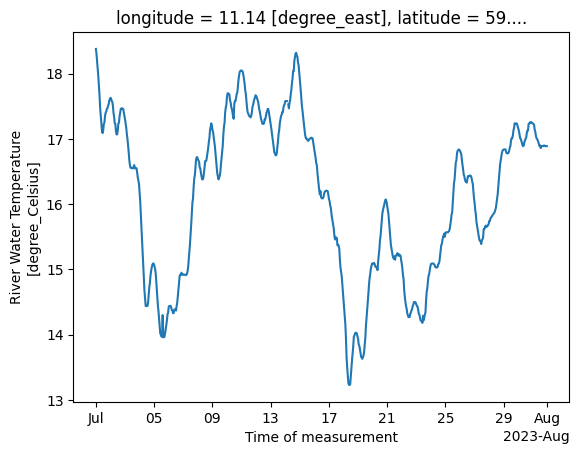

In [4]:
ds_glomma_jul.temp_water_avg.hvplot()

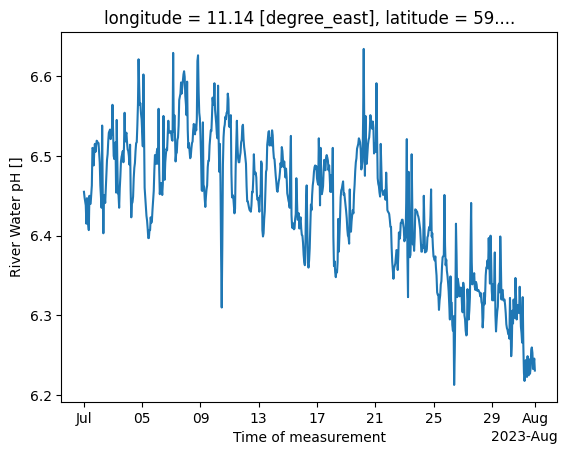

In [5]:
ds_glomma_jul.phvalue_avg.hvplot()

## Color Fantasy dataset example

This example shows how to visualize data variables on a map

### Connect to dataset and subset the data

As in the previous example, connect to the dataset

[Color Fantasy - Daily](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:af11ba01-dfe3-4432-b9d2-4e6fd10714db)

In [10]:
ds_daily = xr.open_dataset("https://thredds.niva.no/thredds/dodsC/datasets/nrt/color_fantasy.nc")
yesterday = (datetime.now() - timedelta(days=1)).date()
ereyesterday = (datetime.now() - timedelta(days=2)).date()
ds_latest = ds_daily.sel(time=slice(ereyesterday, yesterday))
ds_latest

<xarray.Dataset> Size: 92kB
Dimensions:          (time: 1185)
Coordinates:
    latitude         (time) float64 9kB ...
    longitude        (time) float64 9kB ...
  * time             (time) datetime64[ns] 9kB 2025-06-11 ... 2025-06-12
Data variables: (12/13)
    trajectory_name  |S64 64B ...
    temperature      (time) float64 9kB ...
    salinity         (time) float64 9kB ...
    oxygen_sat       (time) float64 9kB ...
    chlorophyll      (time) float64 9kB ...
    turbidity        (time) float64 9kB ...
    ...               ...
    temperature_qc   (time) int8 1kB ...
    salinity_qc      (time) int8 1kB ...
    oxygen_sat_qc    (time) int8 1kB ...
    chlorophyll_qc   (time) int8 1kB ...
    turbidity_qc     (time) int8 1kB ...
    fdom_qc          (time) int8 1kB ...
Attributes: (12/42)
    id:                                        no.niva:af11ba01-dfe3-4432-b9d...
    featureType:                               trajectory
    title:                                     FerryBox on MS Color Fantasy, ...
    summary:                                   The FerryBox system measures t...
    title_no:                                  FerryBox på MS Color Fantasy, ...
    summary_no:                                Ferrybox-systemet måler som st...
    ...                                        ...
    license:                                   http://spdx.org/licenses/CC-BY...
    iso_topic_category:                        oceans
    history:                                   Built with dscreator
    source:                                    FerryBox
    collection:                                GEONOR, NMDC
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...

### Plot variable on a graph and on a map

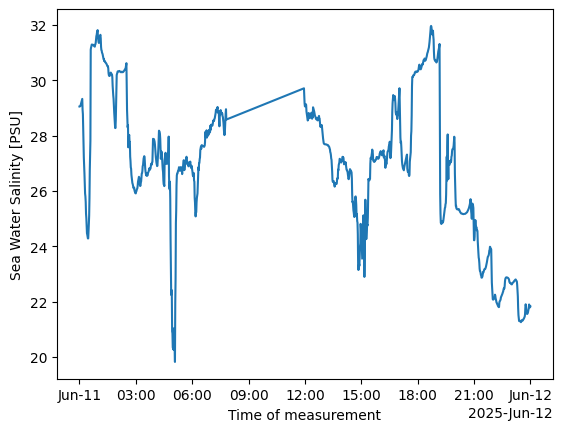

In [11]:
ds_latest.salinity.hvplot()

In [12]:
df_latest = ds_latest.to_dataframe()
df_latest.hvplot.points(
    "longitude", "latitude", color="salinity",
    geo=True, tiles="OSM", frame_width=600, frame_height=400, title="Sea Water Salinity {ereyesterday} to {yesterday}".format(
        ereyesterday=ereyesterday.strftime("%Y-%m-%d"),
        yesterday=yesterday.strftime("%Y-%m-%d")
))

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (salinity)

# Summary

* Available data products
    - Sensor data from ferrybox on Color Fantasy available
    - Sensor data from glomma
* WIP data products
    - Sampling and modeling rivers
    - Ramses sensor(spectral imaging radiometer) data Color Fantasy
* Need bugfix on DDAS
* useGalaxy support for OPeNDAP links would be nice!

## Extra - Color Fantasy historical

[Color Fantasy NorSoop - historical](https://thredds.niva.no/thredds/catalog/subcatalogs/ferryboxes.html?dataset=no.niva:14bb8759-81d8-4a1a-948a-14219d374fab)

In [ ]:
ds = xr.open_dataset("https://thredds.niva.no/thredds/dodsC/datasets/norsoop/color_fantasy/merged_acdd_color_fantasy.nc")

To plot one of the variables on a map, isolate data equivalent to one round trip. This example uses 2022-06-01 to 2022-06-04 as time range

In [ ]:
ds_one_trip = ds.sel(time=slice("2022-06-01", "2022-06-04"))
ds_one_trip

<xarray.Dataset> Size: 226kB
Dimensions:          (time: 4436)
Coordinates:
  * time             (time) datetime64[ns] 35kB 2022-06-01 ... 2022-06-04T23:...
    latitude         (time) float64 35kB ...
    longitude        (time) float64 35kB ...
Data variables:
    temperature      (time) float64 35kB ...
    salinity         (time) float64 35kB ...
    oxygen_sat       (time) float64 35kB ...
    temperature_qc   (time) int8 4kB ...
    salinity_qc      (time) int8 4kB ...
    oxygen_sat_qc    (time) int8 4kB ...
    trajectory_name  |S64 64B ...
Attributes: (12/45)
    title:                                        FerryBox on MS Color Fantasy
    summary:                                      The FerryBox system measure...
    title_no:                                     FerryBox på MS Color Fantasy
    summary_no:                                   Ferrybox-systemet måler som...
    date_created:                                 2024-06-18T11:41:25Z
    keywords:                                     GCMDSK:EARTH SCIENCE > OCEA...
    ...                                           ...
    creator_name:                                 Norwegian Institute for Wat...
    publisher_institution:                        Norwegian Institute for Wat...
    collection:                                   GEONOR, NMDC
    THREDDSMetadata_services_opendap_service:     https://thredds.niva.no/thr...
    THREDDSMetadata_services_httpserver_service:  https://thredds.niva.no/thr...
    DODS_EXTRA.Unlimited_Dimension:               time

### Plot data variable on a map

Transform the array to a pandas dataframe

Plot temperature using hvplot

In [ ]:
df = ds_one_trip.to_dataframe()
df.head(3)

,latitude,longitude,temperature,salinity,oxygen_sat,temperature_qc,salinity_qc,oxygen_sat_qc,trajectory_name
time,,,,,,,,,
2022-06-01 00:00:00,57.582778,11.393990,13.96,26.916,104.24,1,1,1,b'color_fantasy'
2022-06-01 00:01:00,57.588303,11.390728,14.03,26.800,104.14,1,1,1,b'color_fantasy'
2022-06-01 00:02:00,57.593637,11.387573,14.03,26.814,104.09,1,1,1,b'color_fantasy'


In [ ]:
df.hvplot.points(
    "longitude", "latitude", color="temperature",
    geo=True, tiles="OSM", frame_width=600, frame_height=400
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (temperature)